In [160]:
import pandas as pd
import numpy as np
from plotnine import *

c:\Users\wafia\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


In [22]:
# Opening population data
df_pop = pd.read_csv('../20_intermediate_files/vital_stats_merged.csv', index_col=0)
df_pop = df_pop.drop('Crude Rate', axis = 1)
df_pop.sample(5)

,Year,State,State Code,County,County Code,Cause of death,Cause of death Code,Deaths,Population,State_Code,County Name
2130,2009,Texas,48.0,"Galveston County, TX",48167.0,Accidental poisoning by and exposure to other ...,X44,20.0,287428.0,TX,Galveston County
4106,2012,Florida,12.0,"Collier County, FL",12021.0,Accidental poisoning by and exposure to other ...,X44,17.0,332427.0,FL,Collier County
2514,2010,Iowa,19.0,"Polk County, IA",19153.0,Accidental poisoning by and exposure to narcot...,X42,16.0,430640.0,IA,Polk County
3128,2011,California,6.0,"San Francisco County, CA",6075.0,Accidental poisoning by and exposure to narcot...,X42,67.0,812826.0,CA,San Francisco County
2727,2010,New York,36.0,"Onondaga County, NY",36067.0,Accidental poisoning by and exposure to other ...,X44,17.0,467026.0,NY,Onondaga County


In [14]:
# Random checking to make sure we have the states
(df_pop['State']=='Washington').value_counts()

False    1984
True      117
Name: State, dtype: int64

In [40]:
# Opening perscription data
df_pres = pd.read_csv('../20_intermediate_files/prescription_data_grouped_1.csv')
(df_pres['MME']==0).value_counts()
df_pres.sample(2)

,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
136786,NE,SWISHER,2010,0.0
106879,MS,SPOTSYLVANIA,2010,0.0


In [60]:
# Dropping unnecessary columns
df_pop['county_name_only'] = df_pop["County Name"].str[:-7]
df_pop = df_pop.drop(["State Code", "County", 'County Code', 'Cause of death', 'Cause of death Code', 'County Name'], axis=1)

In [61]:
df_pop.sample(2)

,Year,State,Deaths,Population,State_Code,county_name_only
2203,2009,Washington,14.0,239604.0,WA,Yakima
644,2007,Texas,20.0,411416.0,TX,Montgomery


In [115]:
# Creating filter column for population df
df_pop_grouped = df_pop.groupby(['Year', 'State', 'State_Code', 'county_name_only']).sum().reset_index()
df_pop_grouped['county_name_only'] = df_pop_grouped['county_name_only'].str.lower()
df_pop_grouped['Year_string'] = df_pop_grouped['Year'].astype('str')
df_pop_grouped['filter'] = df_pop_grouped['State_Code'] + df_pop_grouped['county_name_only'] + df_pop_grouped['Year_string']
df_pop_grouped

,Year,State,State_Code,county_name_only,Deaths,Population,Year_string,filter
0,2007,Arkansas,AR,garland,12.0,94753.0,2007,ARgarland2007
1,2007,Arkansas,AR,pulaski,11.0,373403.0,2007,ARpulaski2007
2,2007,Arkansas,AR,sebastian,21.0,245892.0,2007,ARsebastian2007
3,2007,California,CA,alameda,178.0,5822860.0,2007,CAalameda2007
4,2007,California,CA,butte,51.0,434938.0,2007,CAbutte2007
...,...,...,...,...,...,...,...,...
986,2012,Washington,WA,snohomish,121.0,2199108.0,2012,WAsnohomish2012
987,2012,Washington,WA,spokane,67.0,951470.0,2012,WAspokane2012
988,2012,Washington,WA,thurston,22.0,516664.0,2012,WAthurston2012
989,2012,Washington,WA,yakima,15.0,246977.0,2012,WAyakima2012


In [69]:
# Filtering year and lowercase county name
df_pres = df_pres.loc[(df_pres['T_YEAR']>2006) & (df_pres['T_YEAR']<2013)]
df_pres['county_name_only'] = df_pres['BUYER_COUNTY'].str.lower()

In [119]:
# Grouping prescription df to avoid duplicate state and county name
df_pres_grouped = df_pres.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'county_name_only']).sum().reset_index()
df_pres_grouped

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME
0,AR,ACCOMACK,2007,accomack,0.0
1,AR,ACCOMACK,2008,accomack,0.0
2,AR,ACCOMACK,2009,accomack,0.0
3,AR,ACCOMACK,2010,accomack,0.0
4,AR,ACCOMACK,2011,accomack,0.0
...,...,...,...,...,...
144667,WY,ZAVALA,2008,zavala,0.0
144668,WY,ZAVALA,2009,zavala,0.0
144669,WY,ZAVALA,2010,zavala,0.0
144670,WY,ZAVALA,2011,zavala,0.0


In [121]:
# Creating filter column for population df
df_pres_grouped['Year'] = df_pres_grouped['T_YEAR'].astype('str')
df_pres_grouped['filter'] = df_pres_grouped['BUYER_STATE'] + df_pres_grouped['county_name_only'] + df_pres_grouped['Year']
df_pres_grouped.loc[df_pres_grouped['BUYER_STATE']=='FL']


In [128]:
# filtering the data to only county and state exist in population data
df_pres_grouped.loc[df_pres_grouped['filter'].isin(df_pop_grouped['filter']),:]

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
421,AR,BENTON,2008,benton,62972.139553,2008,ARbenton2008
422,AR,BENTON,2009,benton,77613.250041,2009,ARbenton2009
423,AR,BENTON,2010,benton,94245.623212,2010,ARbenton2010
424,AR,BENTON,2011,benton,108174.008607,2011,ARbenton2011
425,AR,BENTON,2012,benton,119748.607938,2012,ARbenton2012
...,...,...,...,...,...,...,...
138000,WA,YAKIMA,2007,yakima,48714.182522,2007,WAyakima2007
138002,WA,YAKIMA,2009,yakima,61959.784165,2009,WAyakima2009
138003,WA,YAKIMA,2010,yakima,67468.869215,2010,WAyakima2010
138005,WA,YAKIMA,2012,yakima,80232.646681,2012,WAyakima2012


In [133]:
# dropping unnecessary columns
df_pop_grouped = df_pop_grouped.drop(['Year_string', 'filter'], axis=1)
df_pres_grouped = df_pres_grouped.drop(['Year', 'filter'], axis=1)

In [139]:
# Merge both dataframe into merged_df
merged_df = df_pop_grouped.merge(df_pres_grouped, left_on=["Year","State_Code","county_name_only"], right_on=["T_YEAR","BUYER_STATE","county_name_only"])
merged_df = merged_df.drop(["BUYER_STATE", "BUYER_COUNTY", "T_YEAR"], axis=1)

In [148]:
# Checking value below 10 (small value of mme seems irrelevant)
merged_df.loc[merged_df['MME']<10,:]

,Year,State,State_Code,county_name_only,Deaths,Population,MME


In [232]:
# defining control states
we_want_texas = ['Arkansas', 'California', 'Georgia', 'Missouri', 'New York', 'Wyoming']
we_want_washington = ['Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']
we_want_florida = ['Nevada', 'New York', 'California']

df_washington = merged_df[merged_df['State'].isin(we_want_washington)]
df_texas = merged_df[merged_df['State'].isin(we_want_texas)]
df_florida = merged_df[merged_df['State'].isin(we_want_florida)]

In [150]:
df_washington

,Year,State,State_Code,county_name_only,Deaths,Population,MME
70,2007,Hawaii,HI,hawaii,10.0,177733.0,56901.854294
71,2007,Hawaii,HI,honolulu,75.0,2776005.0,114572.145694
72,2007,Iowa,IA,polk,24.0,826048.0,120235.854095
73,2007,Kansas,KS,johnson,17.0,523879.0,164989.926079
74,2007,Kansas,KS,sedgwick,49.0,956958.0,186817.185338
...,...,...,...,...,...,...,...
952,2012,Virginia,VA,chesterfield,16.0,323856.0,116436.874933
953,2012,Virginia,VA,fairfax,49.0,3355806.0,222331.380174
954,2012,Virginia,VA,henrico,14.0,314932.0,116486.611886
955,2012,Virginia,VA,prince william,18.0,430289.0,121332.220468


In [233]:
# Grouping control state
groupedby_df_washington = df_washington.groupby(["Year"]).sum() 
groupedby_df_washington = groupedby_df_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_washington['Prescription_Rate'] = (groupedby_df_washington['MME']/groupedby_df_washington['Population'])*100_000

groupedby_df_texas = df_texas.groupby(["Year"]).sum() # we feel that sum is the most accurate function to use
groupedby_df_texas = groupedby_df_texas.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_texas['Prescription_Rate'] = (groupedby_df_texas['MME']/groupedby_df_texas['Population'])*100_000

groupedby_df_florida = df_florida.groupby(["Year"]).sum() # we feel that sum is the most accurate function to use
groupedby_df_florida = groupedby_df_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_florida['Prescription_Rate'] = (groupedby_df_florida['MME']/groupedby_df_florida['Population'])*100_000

groupedby_df_washington['Policy_Change'] = "Control"
groupedby_df_florida['Policy_Change'] = "Control"
groupedby_df_texas['Policy_Change'] = "Control"

In [234]:
groupedby_df_florida

,Year,Deaths,Population,MME,Prescription_Rate,Policy_Change
0,2007,4968.0,204065964.0,1.191125e+07,5836.959790,Control
1,2008,4942.0,208710805.0,1.302120e+07,6238.869789,Control
2,2009,4928.0,216166395.0,1.493043e+07,6906.915624,Control
3,2010,4984.0,228998075.0,1.633984e+07,7135.362061,Control
4,2011,5555.0,224001059.0,1.731199e+07,7728.528509,Control
5,2012,5524.0,235021275.0,1.758524e+07,7482.405338,Control


In [235]:
# Grouping treatment state
we_want_only_texas = ['Texas']
we_want_only_washington = ['Washington']
we_want_only_florida = ['Florida']

df_only_washington = merged_df[merged_df['State'].isin(we_want_only_washington)]
df_only_texas = merged_df[merged_df['State'].isin(we_want_only_texas)]
df_only_florida = merged_df[merged_df['State'].isin(we_want_only_florida)]

groupedby_df_only_washington = df_only_washington.groupby(["Year"]).sum() 
groupedby_df_only_washington = groupedby_df_only_washington.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_washington['Prescription Rate'] = (groupedby_df_only_washington['MME']/groupedby_df_only_washington['Population'])*100_000

groupedby_df_only_texas = df_only_texas.groupby(["Year"]).sum() 
groupedby_df_only_texas = groupedby_df_only_texas.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_texas['Prescription Rate'] = (groupedby_df_only_texas['MME']/groupedby_df_only_texas['Population'])*100_000

groupedby_df_only_florida = df_only_florida.groupby(["Year"]).sum() 
groupedby_df_only_florida = groupedby_df_only_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_florida['Prescription Rate'] = (groupedby_df_only_florida['Deaths']/groupedby_df_only_florida['Population'])*100_000

groupedby_df_only_washington['Policy_Change'] = "Treatment"
groupedby_df_only_texas['Policy_Change'] = "Treatment"
groupedby_df_only_florida['Policy_Change'] = "Treatment"

In [236]:
groupedby_df_only_florida

,Year,Deaths,Population,MME,Prescription Rate,Policy_Change
0,2007,2176.0,45258506.0,8.528943e+06,4.807936,Treatment
1,2008,2347.0,51903064.0,1.129147e+07,4.521891,Treatment
2,2009,2401.0,44923249.0,1.422362e+07,5.344671,Treatment
3,2010,2427.0,47464766.0,1.889225e+07,5.113267,Treatment
4,2011,2267.0,46037340.0,1.390429e+07,4.924264,Treatment
5,2012,1942.0,47054601.0,8.014654e+06,4.127120,Treatment


In [252]:
# function to make ggplot
def diffIndiff(
    prepolicy_contr,
    postpolicy_contr,
    prepolicy_treatment,
    postpolicy_treatment,
    xvar,
    yvar,
    policyyear,
):
    dd = (
        ggplot()
        # plot all chosen states,  pre policy year
        + geom_smooth(
            prepolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot all chosen states, post policy year
        + geom_smooth(
            postpolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2007, 2008, 2009, 2010, 2011, 2012], limits=[2008, 2012])
    )
    return dd

def pre_post(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    ppo = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        +scale_color_manual(values=["darkturquoise","darkturquoise"])
        + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2007, 2008, 2009, 2010, 2011, 2012], limits=[2008, 2012])
    )
    return ppo

In [253]:
wa_prepol_control = groupedby_df_washington[(groupedby_df_washington['Year']<2010)]
wa_postpol_control = groupedby_df_washington[(groupedby_df_washington['Year']>=2010)]

wa_prepol_treatment = groupedby_df_only_washington [(groupedby_df_only_washington['Year']<2010)]
wa_postpol_treatment = groupedby_df_only_washington[(groupedby_df_only_washington['Year']>=2010)]

c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


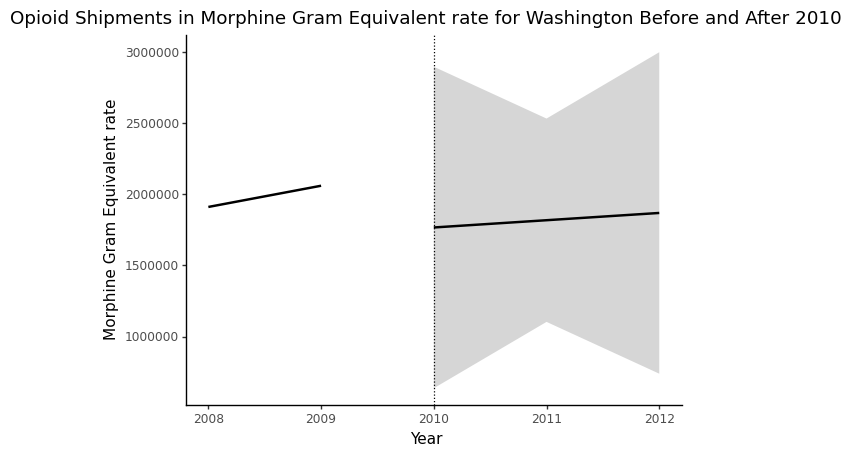

In [254]:
prepos = (
    pre_post(wa_prepol_treatment, wa_postpol_treatment, "Year", "MME", 2010)
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Washington Before and After 2010"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars


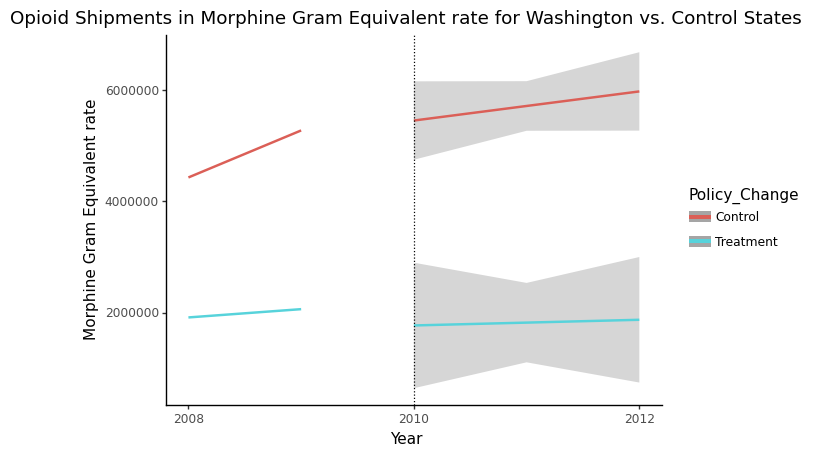

In [239]:
diff = (
    diffIndiff(
        wa_prepol_control, wa_postpol_control, wa_prepol_treatment, wa_postpol_treatment, "Year", "MME", 2010
    )
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Washington vs. Control States",
        color="Policy_Change",
    )
    + ylab("Morphine Gram Equivalent rate")
)
print(diff)

In [240]:
fl_prepol_control = groupedby_df_florida[(groupedby_df_florida['Year']<2010)]
fl_prepol_treatment = groupedby_df_only_florida [(groupedby_df_only_florida['Year']<2010)]
fl_postpol_control = groupedby_df_florida[(groupedby_df_florida['Year']>=2010)]
fl_postpol_treatment = groupedby_df_only_florida[(groupedby_df_only_florida['Year']>=2010)]

c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


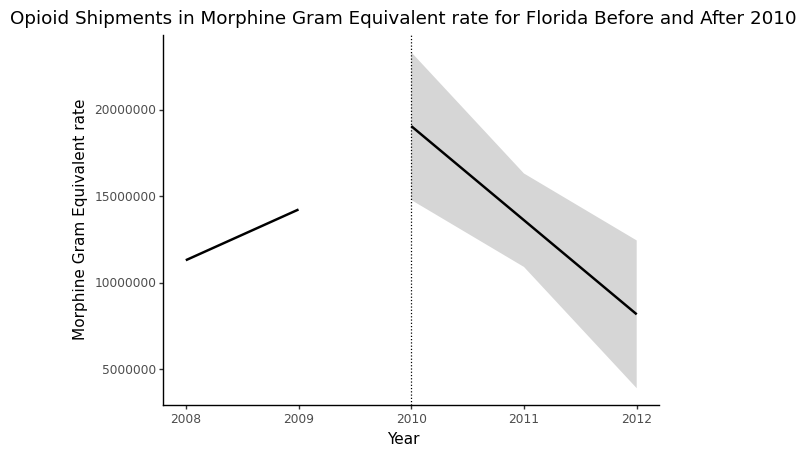

In [255]:
prepos = (
    pre_post(fl_prepol_treatment, fl_postpol_treatment, "Year", "MME", 2010)
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Florida Before and After 2010"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars


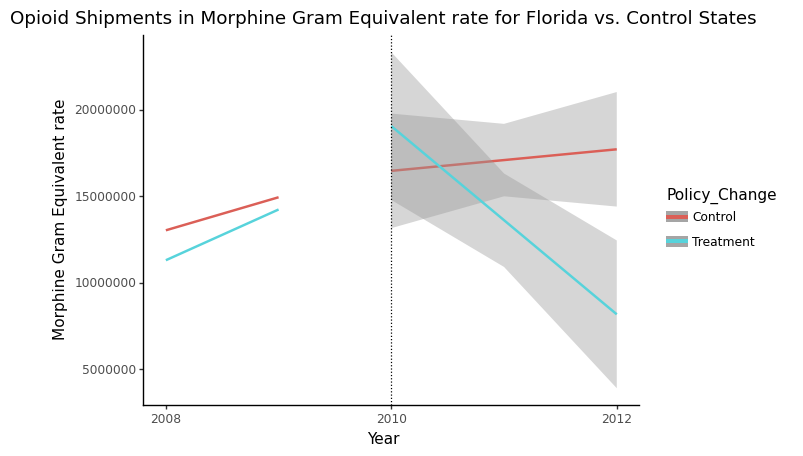

In [241]:
diff = (
    diffIndiff(
        fl_prepol_control, fl_postpol_control, fl_prepol_treatment, fl_postpol_treatment, "Year", "MME", 2010
    )
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Florida vs. Control States",
        color="Policy_Change",
    )
    + ylab("Morphine Gram Equivalent rate")
)
print(diff)

In [242]:
tx_prepol_control = groupedby_df_texas[(groupedby_df_texas['Year']<2010)]
tx_prepol_treatment = groupedby_df_only_texas [(groupedby_df_only_texas['Year']<2010)]
tx_postpol_control = groupedby_df_texas[(groupedby_df_texas['Year']>=2010)]
tx_postpol_treatment = groupedby_df_only_texas[(groupedby_df_only_texas['Year']>=2010)]

c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


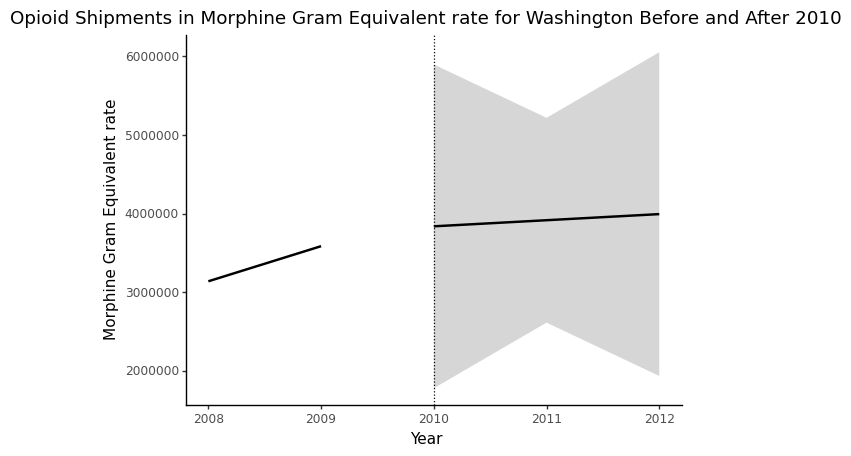

In [256]:
prepos = (
    pre_post(tx_prepol_treatment, tx_postpol_treatment, "Year", "MME", 2010)
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Washington Before and After 2010"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
c:\Users\wafia\miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars


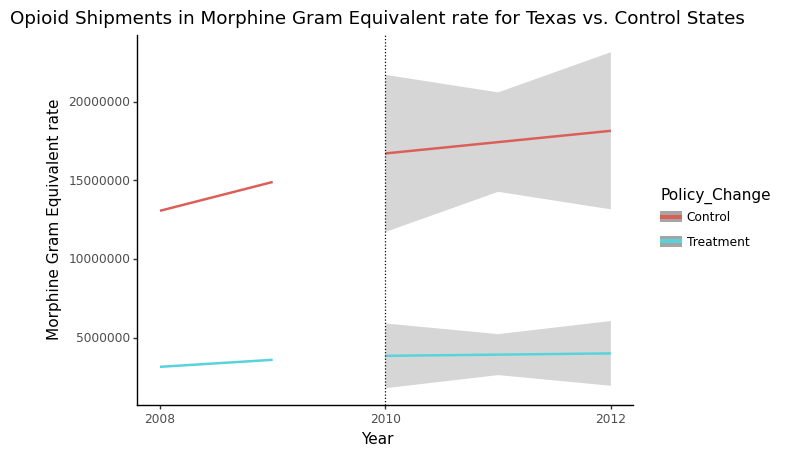

In [243]:
diff = (
    diffIndiff(
        tx_prepol_control, tx_postpol_control, tx_prepol_treatment, tx_postpol_treatment, "Year", "MME", 2010
    )
    + labs(
        title="Opioid Shipments in Morphine Gram Equivalent rate for Texas vs. Control States",
        color="Policy_Change",
    )
    + ylab("Morphine Gram Equivalent rate")
)
print(diff)